In [2]:
import pandas as pd
from datetime import datetime

In [3]:
data = pd.read_csv('../files_for_lab/csv_files/marketing_customer_analysis.csv')
data_bp = pd.read_csv('../files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
data.shape

(10910, 26)

In [5]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
data.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [7]:
data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [8]:
data.drop(['unnamed:_0'], axis=1, inplace=True)
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [9]:
data_types = {
    'categorical': [],
    'numerical': []
}

for c, t in data.dtypes.items():
    if t == 'object':
        data_types['categorical'].append(c)
    else:
        data_types['numerical'].append(c)

print(data_types)

{'categorical': ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'], 'numerical': ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']}


In [10]:
data.dropna(inplace=True)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [11]:
month = [datetime.strptime(i, '%m/%d/%y').month for i in data['effective_to_date']]

data['effective_to_date_month'] = month
print('months: ', data['effective_to_date_month'].unique())
data[data['effective_to_date_month'] < 4]

months:  [2 1]


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [12]:
# consolidate all steps into fn:

In [13]:
def prepare_data_set(df):
    # normalize headers:
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    
    # drop unused columns and remove NaNs
    df.drop(['unnamed:_0'], axis=1, inplace=True)
    df.dropna(inplace=True)
    
    # add effective_to_date_month 
    month = [datetime.strptime(i, '%m/%d/%y').month for i in df['effective_to_date']]
    df['effective_to_date_month'] = month
    
    return df

In [14]:
df = prepare_data_set(data_bp)
df[df['effective_to_date_month'] < 4]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [15]:
# Customer Analysis Round 3

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       4543 non-null   object 
 1   state                          4543 non-null   object 
 2   customer_lifetime_value        4543 non-null   float64
 3   response                       4543 non-null   object 
 4   coverage                       4543 non-null   object 
 5   education                      4543 non-null   object 
 6   effective_to_date              4543 non-null   object 
 7   employmentstatus               4543 non-null   object 
 8   gender                         4543 non-null   object 
 9   income                         4543 non-null   int64  
 10  location_code                  4543 non-null   object 
 11  marital_status                 4543 non-null   object 
 12  monthly_premium_auto           4543 non-null   

In [17]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525,1.469734
std,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990,0.499138
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145,1.000000
50%,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000,1.000000
75%,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000,2.000000
max,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
pd.set_option('display.max_columns', None) # displays all columns in dfs

import warnings
warnings.filterwarnings('ignore') # no more warnings 

<AxesSubplot:xlabel='response', ylabel='count'>

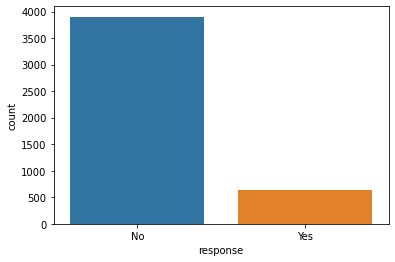

In [20]:
sns.countplot('response', data=df)


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

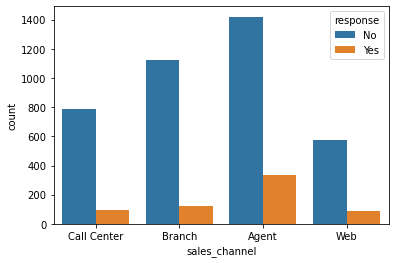

In [21]:
sns.countplot('sales_channel', hue='response', data=df)

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

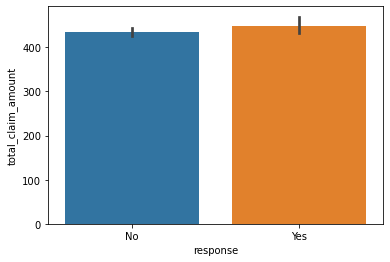

In [22]:
sns.barplot(x="response", y="total_claim_amount", data=df)

<AxesSubplot:xlabel='response', ylabel='income'>

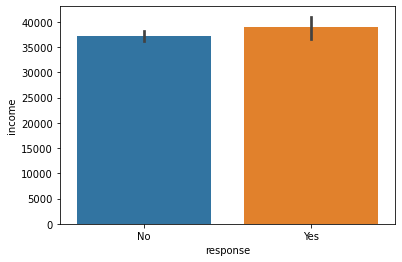

In [23]:
sns.barplot(x="response", y="income", data=df)

### customer analyis round 4

In [24]:
data_types

{'categorical': ['customer',
  'state',
  'response',
  'coverage',
  'education',
  'effective_to_date',
  'employmentstatus',
  'gender',
  'location_code',
  'marital_status',
  'policy_type',
  'policy',
  'renew_offer_type',
  'sales_channel',
  'vehicle_class',
  'vehicle_size',
  'vehicle_type'],
 'numerical': ['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies',
  'total_claim_amount']}

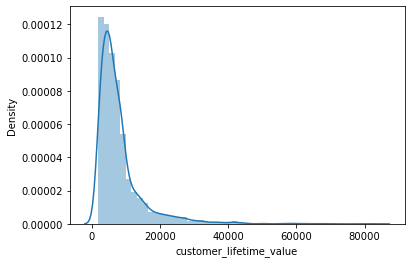

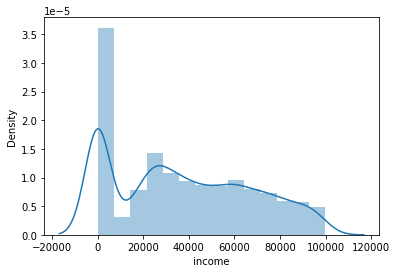

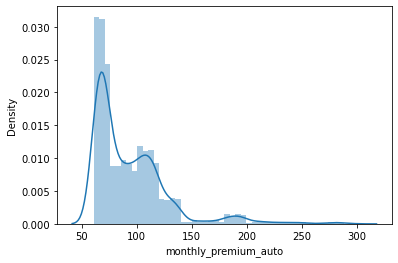

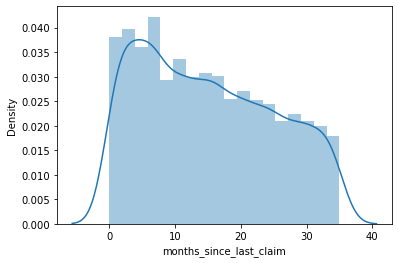

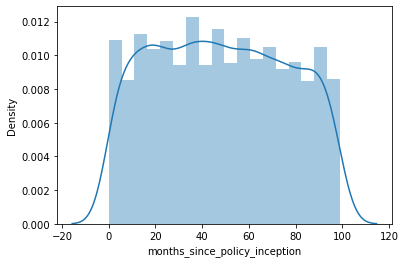

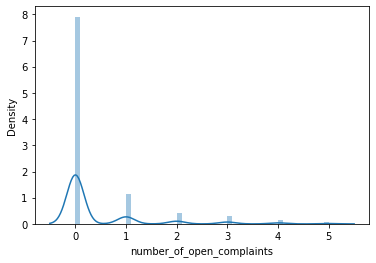

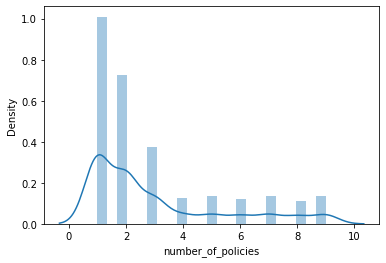

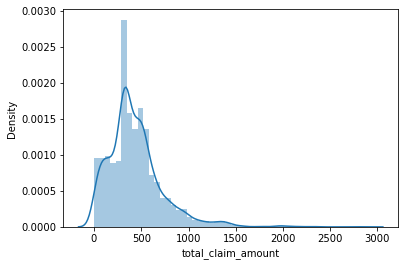

In [25]:
for column in data_types['numerical']:
    sns.distplot(df[column])
    plt.show()

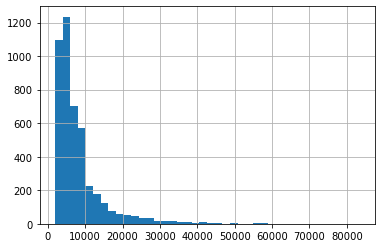

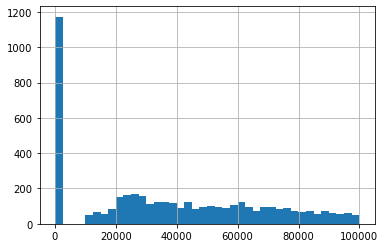

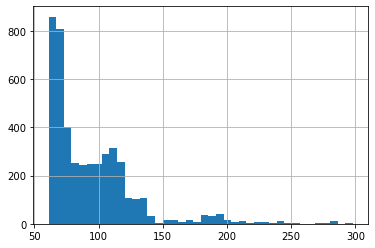

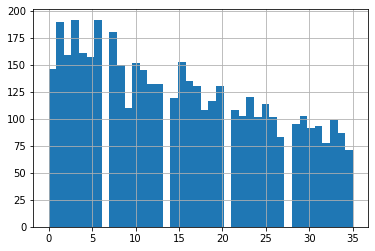

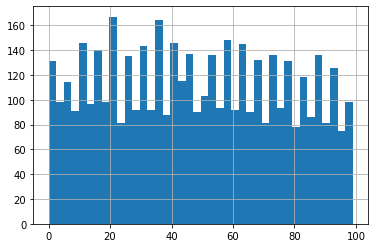

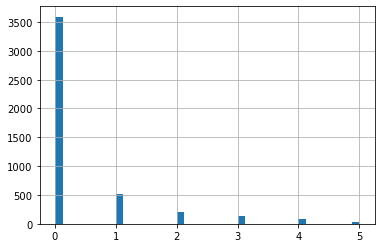

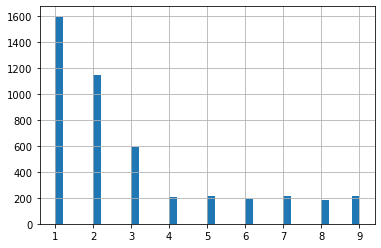

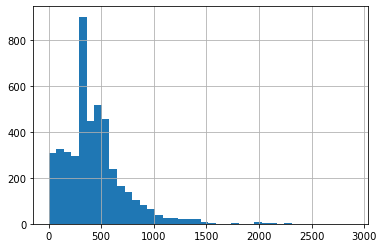

In [26]:
for column in data_types['numerical']:
    df[column].hist(bins=40)
    plt.show()

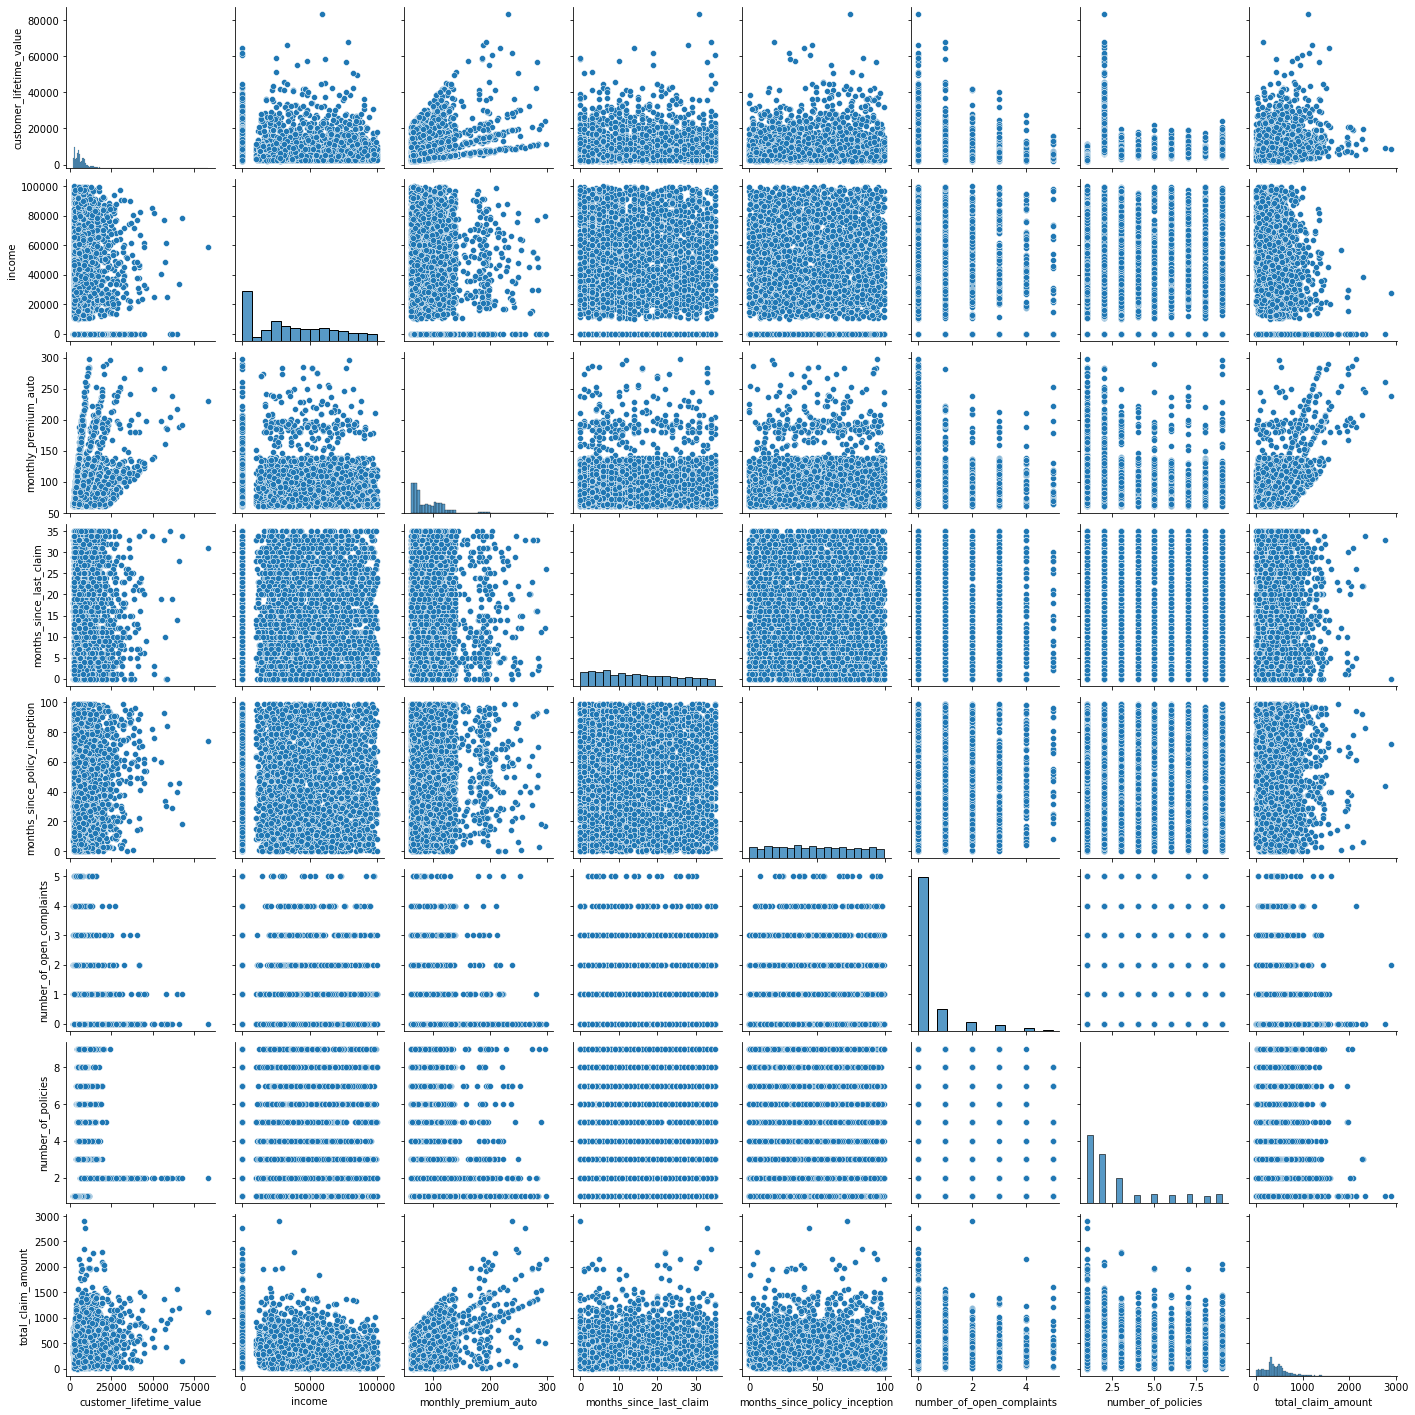

In [27]:
sns.pairplot(df[data_types['numerical']])

In [28]:
# correlation check with default spearman
corrmatrix = df[data_types['numerical']].corr()
corrmatrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
monthly_premium_auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
months_since_last_claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months_since_policy_inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number_of_open_complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number_of_policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
total_claim_amount,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


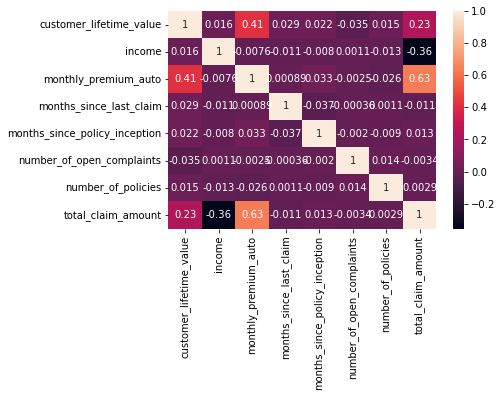

In [29]:
sns_heat = sns.heatmap(corrmatrix, annot=True)
figure = sns_heat.get_figure()    
plt.show()

In [30]:
# check for correlation with specific threshold
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [31]:
correlation(df[data_types['numerical']], 0.6)

{'total_claim_amount'}

In [32]:
mask = np.zeros_like(corrmatrix)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
mask[np.triu_indices_from(mask)] = True # hide repeat half of the matrix
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

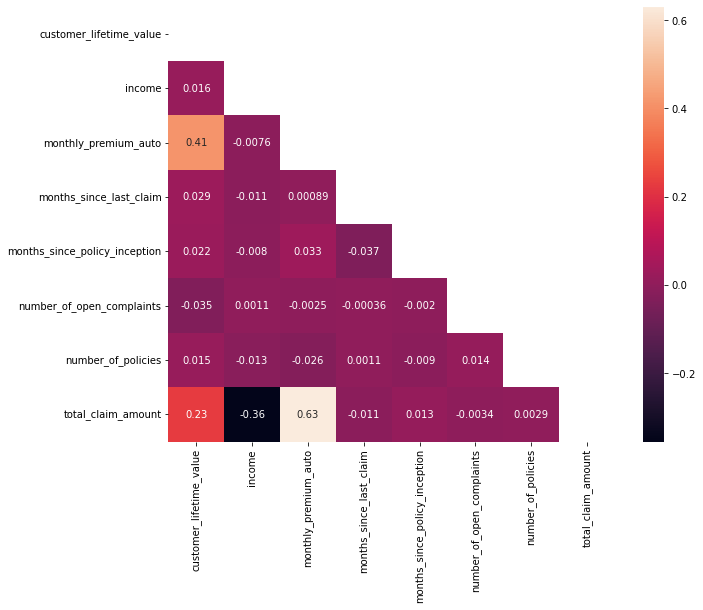

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corrmatrix, mask=mask, annot=True)
plt.show()

## Data Preprocessing

#### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

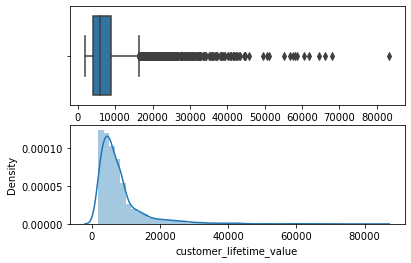

In [36]:
# use 'customer_lifetime_value' to try different things
fig, ax = plt.subplots(2)
sns.boxplot(df['customer_lifetime_value'], ax=ax[0])
sns.distplot(df['customer_lifetime_value'], ax=ax[1])
fig.show()

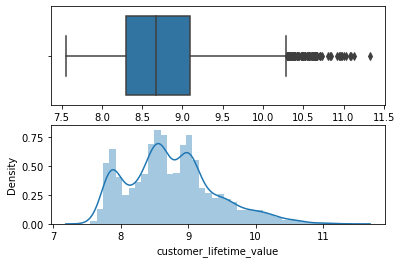

In [37]:
# apply log transformation on skewed distribution (PowerTransform)
df_experiment_1 = df.copy()
df_experiment_1['customer_lifetime_value'] = df_experiment_1['customer_lifetime_value'].apply(lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN)

fig, ax = plt.subplots(2)
sns.boxplot(df_experiment_1['customer_lifetime_value'], ax=ax[0])
sns.distplot(df_experiment_1['customer_lifetime_value'], ax=ax[1])
fig.show()


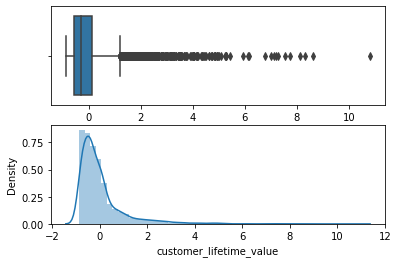

In [38]:
# apply standart scaler
sscaler = StandardScaler()
df_experiment_2 = df.copy()
df_experiment_2[['customer_lifetime_value']] = sscaler.fit_transform(df_experiment_2[['customer_lifetime_value']])

fig, ax = plt.subplots(2)
sns.boxplot(df_experiment_2['customer_lifetime_value'], ax=ax[0])
sns.distplot(df_experiment_2['customer_lifetime_value'], ax=ax[1])
fig.show()

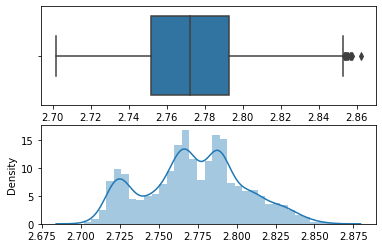

In [39]:
# apply box-cox 
df_experiment_3 = df.copy()
transformed_data, _ci = stats.boxcox(df_experiment_3['customer_lifetime_value'])

fig, ax = plt.subplots(2)
sns.boxplot(transformed_data, ax=ax[0])
sns.distplot(transformed_data, ax=ax[1])
fig.show()

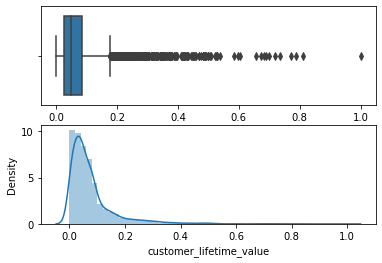

In [40]:
# apply min max scaler
df_experiment_4 = df.copy()
mmscaler = MinMaxScaler()

df_experiment_4[['customer_lifetime_value']] = mmscaler.fit_transform(df_experiment_4[['customer_lifetime_value']])
fig, ax = plt.subplots(2)
sns.boxplot(df_experiment_4['customer_lifetime_value'], ax=ax[0])
sns.distplot(df_experiment_4['customer_lifetime_value'], ax=ax[1])
fig.show()

In [41]:
# split data 
X = df.drop(['total_claim_amount'], axis=1)
y = df['total_claim_amount']

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [42]:
# apply normalizer to all numerical types
normalizer = Normalizer()

x_normalized = normalizer.fit_transform(X_num)
x_normalized

array([[5.59573341e-01, 8.28770586e-01, 3.74348700e-03, ...,
        0.00000000e+00, 7.48697400e-05, 7.48697400e-05],
       [4.14175077e-01, 9.10195435e-01, 1.79895182e-03, ...,
        0.00000000e+00, 3.70917900e-05, 1.85458950e-05],
       [6.21876034e-02, 9.98063219e-01, 1.53214105e-03, ...,
        0.00000000e+00, 1.20641027e-05, 1.20641027e-05],
       ...,
       [9.99951054e-01, 0.00000000e+00, 9.72468995e-03, ...,
        0.00000000e+00, 1.04007379e-04, 1.04007379e-04],
       [8.56980004e-02, 9.96319969e-01, 1.05911749e-03, ...,
        0.00000000e+00, 9.77646913e-05, 1.62941152e-05],
       [1.83332463e-01, 9.83047898e-01, 2.41952750e-03, ...,
        6.12538608e-05, 9.18807912e-05, 3.06269304e-05]])

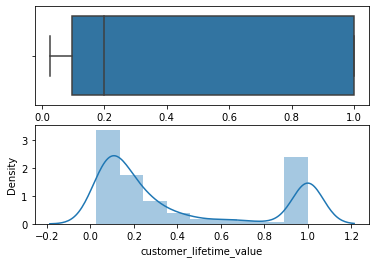

In [43]:
# normalizer seems to strip the colum headers
x_normalized_df = pd.DataFrame(x_normalized, columns=X_num.columns) # not entirely sure if this is the correct approach

fig, ax = plt.subplots(2)
sns.boxplot(x_normalized_df['customer_lifetime_value'], ax=ax[0])
sns.distplot(x_normalized_df['customer_lifetime_value'], ax=ax[1])
fig.show()

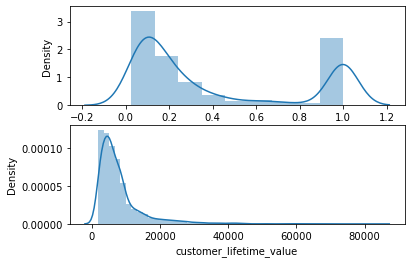

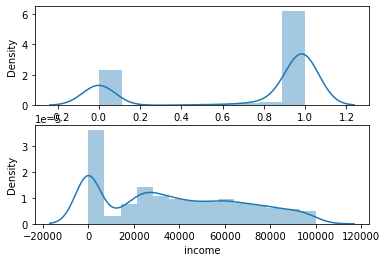

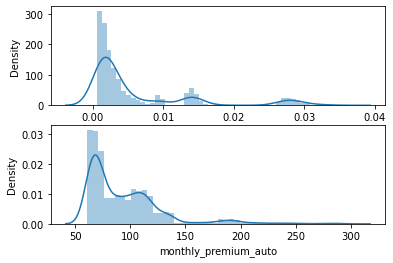

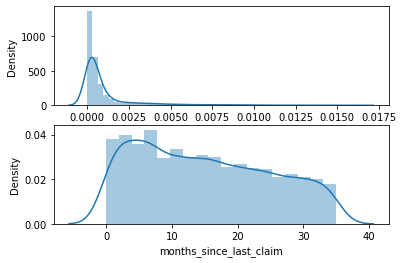

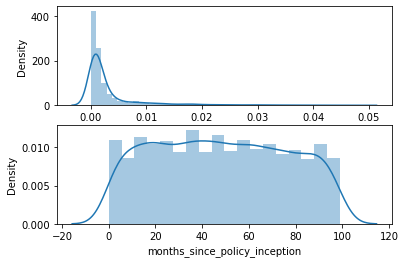

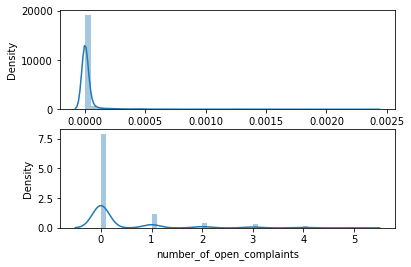

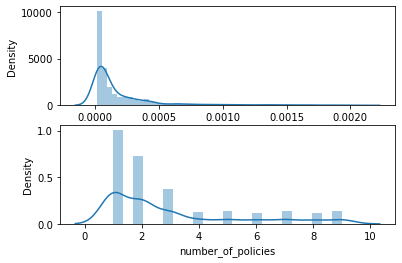

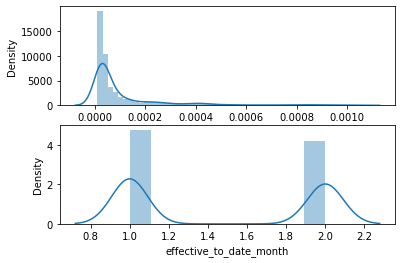

In [44]:
for column in x_normalized_df:
    fig, ax = plt.subplots(2)
    sns.distplot(x_normalized_df[column], ax=ax[0])
    sns.distplot(df[column], ax=ax[1])
    fig.show()

#### Encoding categoricals

In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
X_cat_modified = X_cat.drop(['customer', 'effective_to_date'], axis=1)
X_cat_modified

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [53]:
# use get_dummies for encoding
encoded_data = pd.get_dummies(X_cat_modified, drop_first=True) 
encoded_data

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
16,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
10903,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
10904,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
10906,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [74]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoded_cat = encoder.fit_transform(X_cat_modified).toarray()

In [75]:
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-Door Car'],

In [76]:
x_normalized

array([[5.59573341e-01, 8.28770586e-01, 3.74348700e-03, ...,
        0.00000000e+00, 7.48697400e-05, 7.48697400e-05],
       [4.14175077e-01, 9.10195435e-01, 1.79895182e-03, ...,
        0.00000000e+00, 3.70917900e-05, 1.85458950e-05],
       [6.21876034e-02, 9.98063219e-01, 1.53214105e-03, ...,
        0.00000000e+00, 1.20641027e-05, 1.20641027e-05],
       ...,
       [9.99951054e-01, 0.00000000e+00, 9.72468995e-03, ...,
        0.00000000e+00, 1.04007379e-04, 1.04007379e-04],
       [8.56980004e-02, 9.96319969e-01, 1.05911749e-03, ...,
        0.00000000e+00, 9.77646913e-05, 1.62941152e-05],
       [1.83332463e-01, 9.83047898e-01, 2.41952750e-03, ...,
        6.12538608e-05, 9.18807912e-05, 3.06269304e-05]])

In [70]:
x_normalized_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
0,0.559573,0.828771,0.003743,0.001273,0.001160,0.000000,0.000075,0.000075
1,0.414175,0.910195,0.001799,0.000185,0.000056,0.000000,0.000037,0.000019
2,0.062188,0.998063,0.001532,0.000157,0.000374,0.000000,0.000012,0.000012
3,0.081952,0.996636,0.001037,0.000376,0.000376,0.000000,0.000060,0.000015
4,0.069266,0.997598,0.000858,0.000338,0.000130,0.000000,0.000078,0.000026
...,...,...,...,...,...,...,...,...
4538,0.125450,0.992094,0.003190,0.000351,0.001052,0.000070,0.000035,0.000035
4539,0.046257,0.998928,0.001235,0.000501,0.001369,0.000067,0.000017,0.000017
4540,0.999951,0.000000,0.009725,0.000728,0.001664,0.000000,0.000104,0.000104
4541,0.085698,0.996320,0.001059,0.000114,0.001108,0.000000,0.000098,0.000016


In [79]:
# concatenate encoded + normalized numerical cols
X = np.concatenate([x_normalized_df, encoded_cat], axis=1)
X

array([[0.55957334, 0.82877059, 0.00374349, ..., 0.        , 1.        ,
        0.        ],
       [0.41417508, 0.91019543, 0.00179895, ..., 0.        , 1.        ,
        0.        ],
       [0.0621876 , 0.99806322, 0.00153214, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99995105, 0.        , 0.00972469, ..., 0.        , 1.        ,
        0.        ],
       [0.085698  , 0.99631997, 0.00105912, ..., 0.        , 1.        ,
        0.        ],
       [0.18333246, 0.9830479 , 0.00241953, ..., 0.        , 1.        ,
        0.        ]])

In [80]:
# traint-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Analyze results

In [82]:
# run againts test data set
predictions  = model.predict(X_test)
predictions.shape

(1363,)

In [89]:
print('R2: ', r2_score(y_test, predictions))
print('RMSE: ', mean_squared_error(y_test, predictions, squared=False))
print('MSE: ', mean_squared_error(y_test, predictions))
print('MAE: ', mean_absolute_error(y_test, predictions))


R2:  0.7475494506832094
RMSE:  141.88544470969293
MSE:  20131.47942046733
MAE:  98.45470237353955


In [85]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
4027,620.011594,479.652961,140.358633
3686,304.156333,557.116611,252.960278
5161,345.600000,385.622681,40.022681
8776,297.600000,400.220392,102.620392
1748,351.403677,453.967242,102.563565
...,...,...,...
3370,528.000000,592.465604,64.465604
6950,371.802628,404.588300,32.785672
6322,604.800000,647.206009,42.406009
985,139.489926,-37.690776,177.180702


<AxesSubplot:xlabel='true', ylabel='pred'>

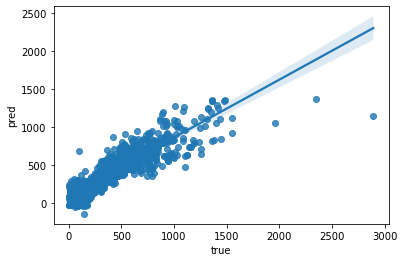

In [86]:
sns.regplot(results['true'], results['pred'])